In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
cars = pd.read_csv("C:/Users/samrat/Downloads/Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatterplot between variables along with histograms

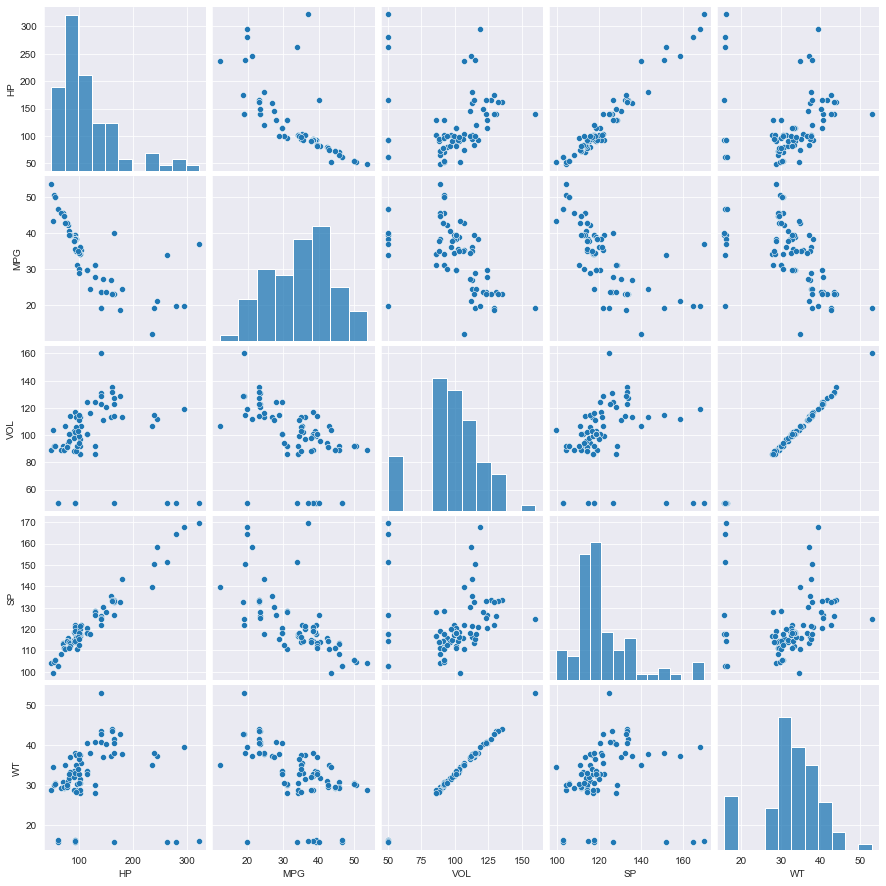

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [7]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359846, 0.7584602881431417)

# Simple Linear Regression Models

In [11]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [12]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [13]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF

In [14]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


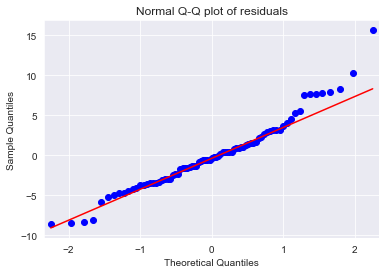

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

## Residual Plot for Homoscedasticity

In [17]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

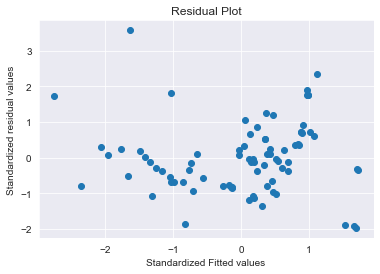

In [18]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

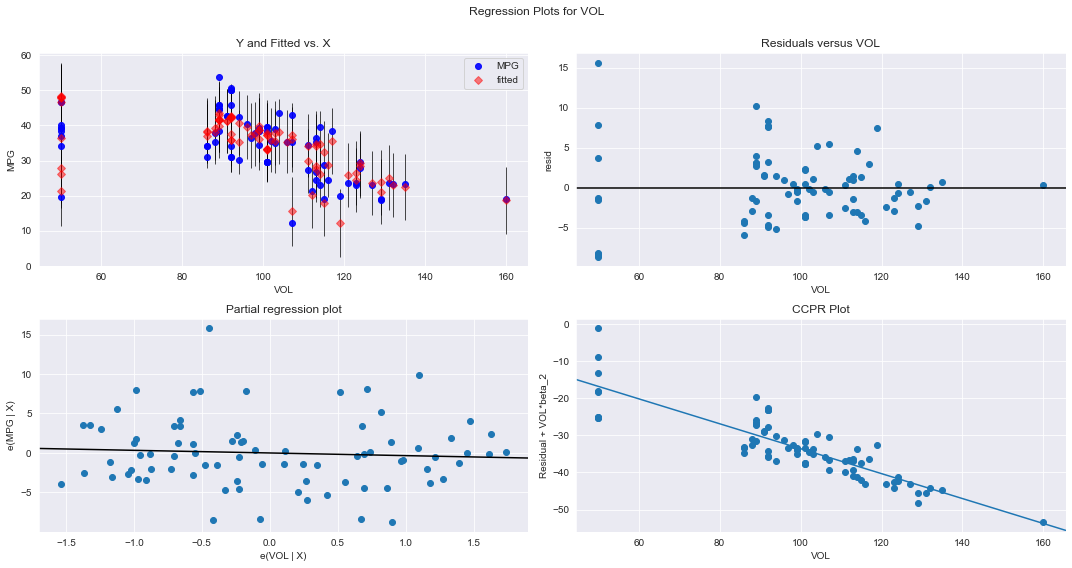

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

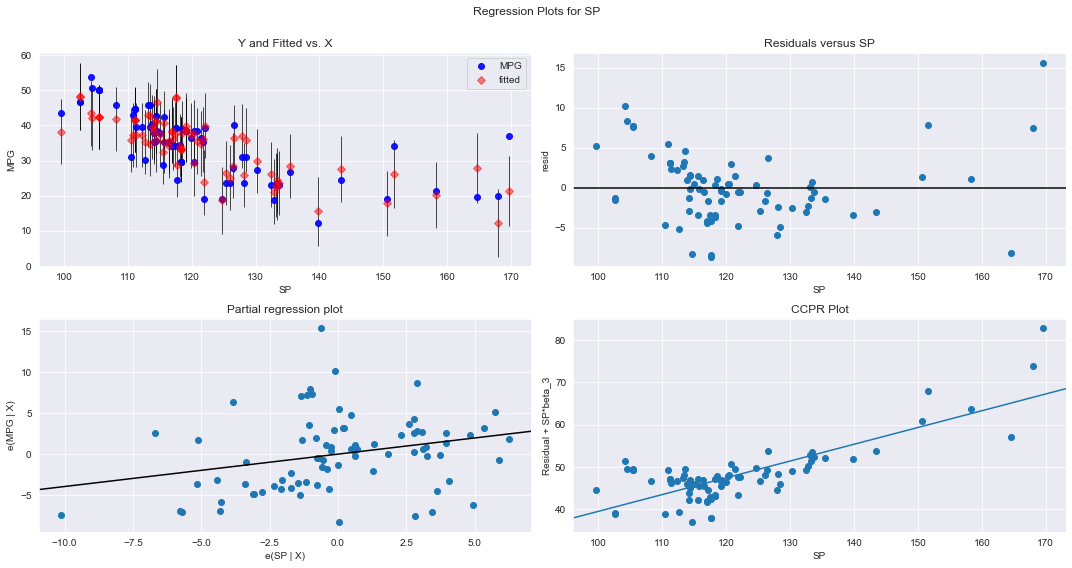

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

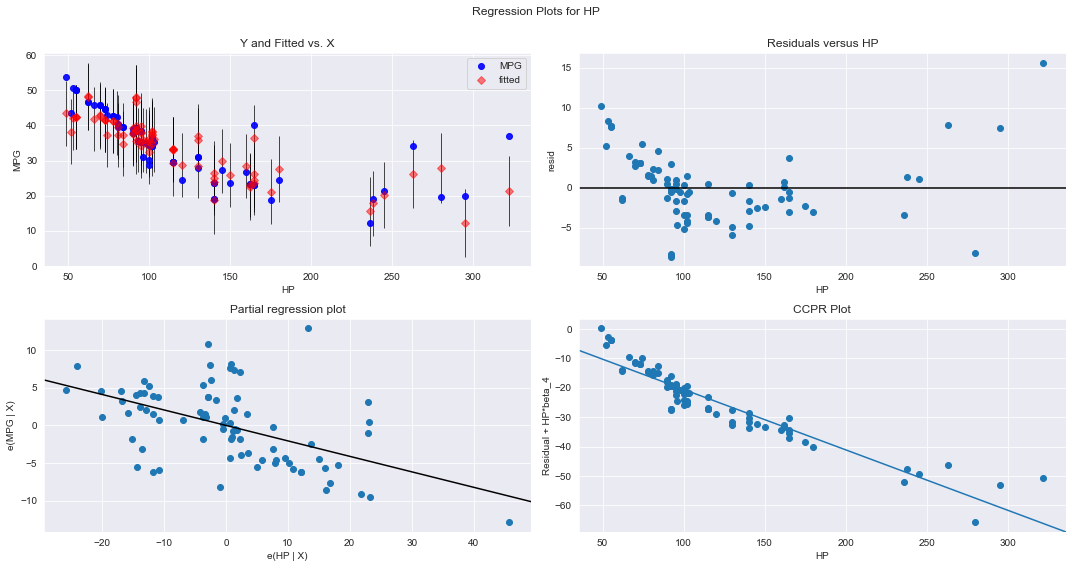

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

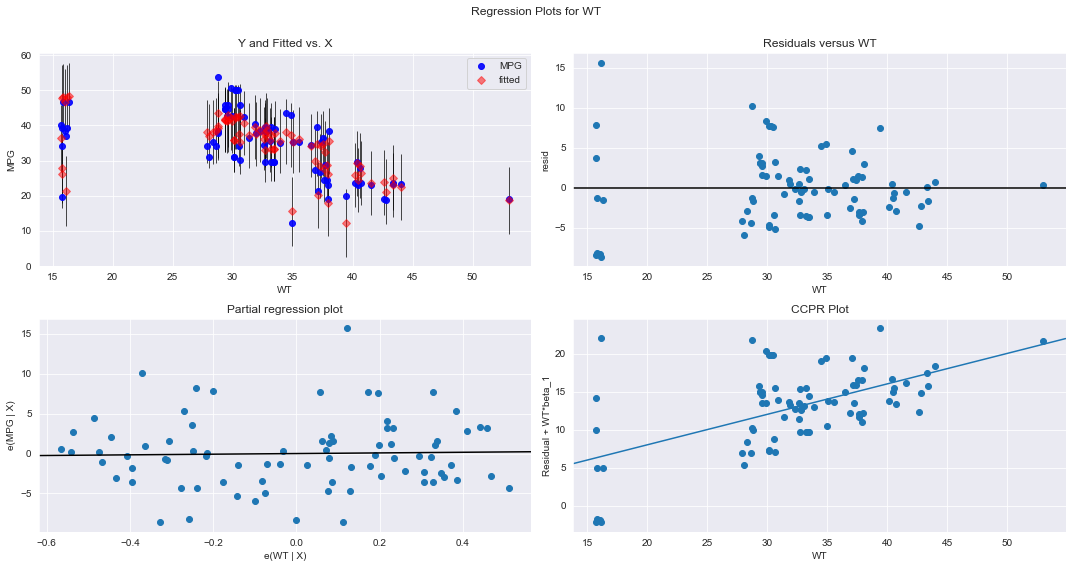

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [23]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

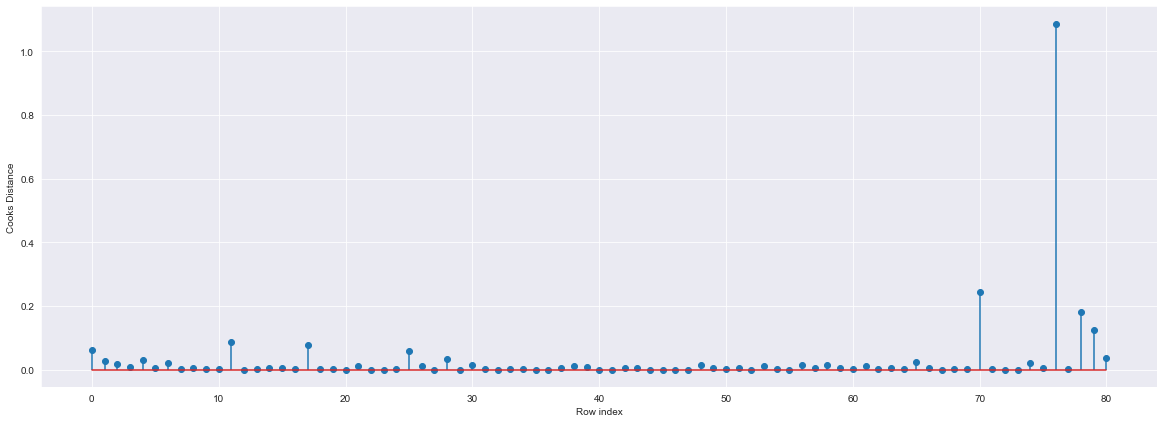

In [24]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [25]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998180163)

## High Influence points

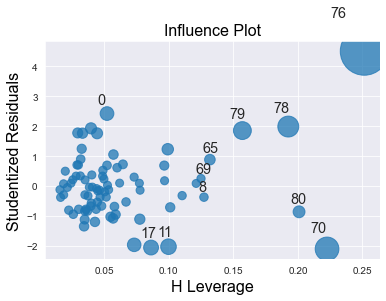

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [27]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [28]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [29]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [30]:
#Load the data
cars_new = pd.read_csv("../input/cars12345/Cars (2).csv")

FileNotFoundError: [Errno 2] No such file or directory: '../input/cars12345/Cars (2).csv'

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [ ]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [ ]:
car1

# Build Model

In [ ]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

In [ ]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [ ]:
(final_ml_W.rsquared,final_ml_W.aic)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

In [ ]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [ ]:
car2

In [ ]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [ ]:
car4=car3.drop(['index'],axis=1)

In [ ]:
car4

In [ ]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

## Predicting for new data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [ ]:
final_ml_V.predict(new_data)

In [ ]:
final_ml_V.predict(cars_new.iloc[0:5,])

In [ ]:
pred_y = final_ml_V.predict(cars_new)

In [ ]:
pred_y

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(cars.MPG);
plt.xlabel('HP');
plt.ylabel('MPG');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('HP');
plt.ylabel('VOL');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('HP');
plt.ylabel('SP');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('HP');
plt.ylabel('WT');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('MPG');
plt.ylabel('VOL');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('MPG');
plt.ylabel('SP');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('MPG');
plt.ylabel('WT');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('VOL');
plt.ylabel('SP');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('VOL');
plt.ylabel('WT');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('SP');
plt.ylabel('WT');

In [ ]:
plt.plot(cars.WT);
plt.xlabel('MPG');
plt.ylabel('VOL');

In [ ]:
plt.plot(cars.SP);
plt.xlabel('HP');
plt.ylabel('VOL');

In [ ]:
plt.plot(cars.MPG);
plt.xlabel('WT');
plt.ylabel('SP');

In [ ]:
#drop first row since it is NaN
cars = cars.dropna()

In [ ]:
cars

In [ ]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(cars.index);
plt.xlabel('VOL');
plt.ylabel('MPG');

In [ ]:
#Plot the gains
plt.figure(figsize = (10, 6));
plt.plot(cars.index);
plt.xlabel('WT');
plt.ylabel('SP');

In [ ]:
sn.distplot(cars, label = 'CARS');
plt.xlabel('VOL');
plt.ylabel('SP');
plt.legend();

In [ ]:
sn.distplot(cars, label = 'CARS');
plt.xlabel('MPG');
plt.ylabel('WT');
plt.legend();

Text(0.5, 1.0, 'Line Plot')

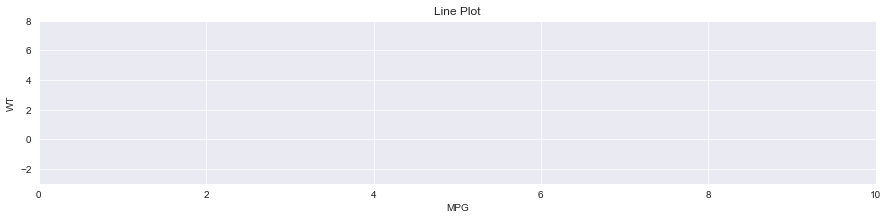

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,3))
plt.xlim(0,10)
plt.ylim(-3,8)
plt.xlabel('MPG')
plt.ylabel('WT')
plt.title('Line Plot')

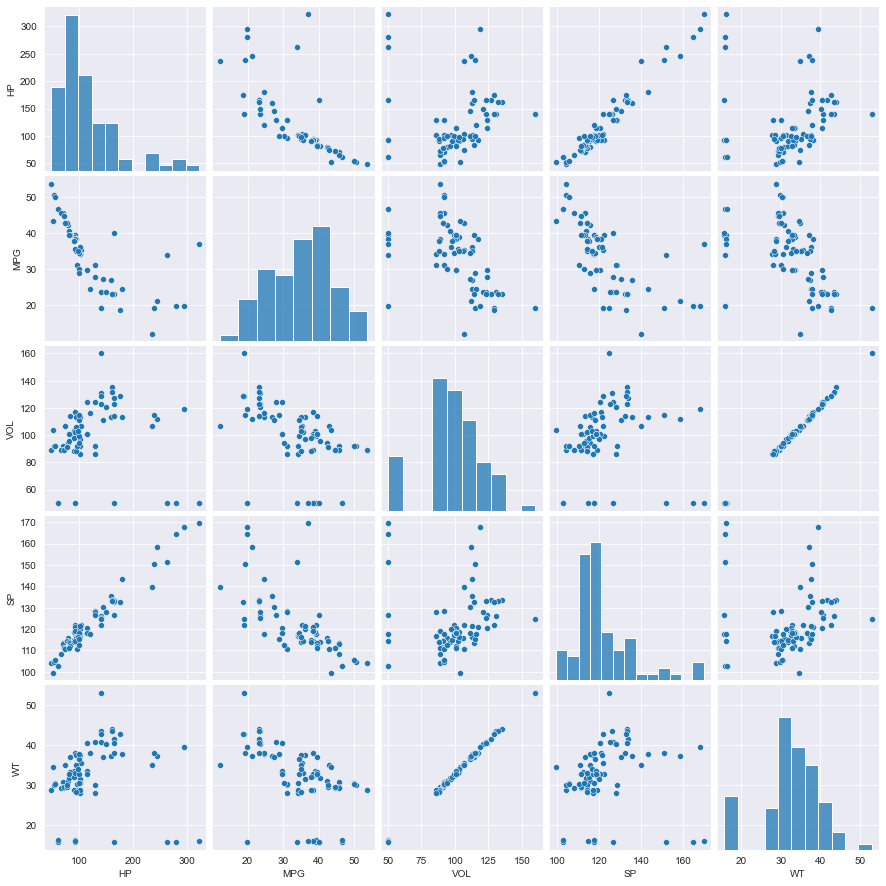

In [36]:
sns.pairplot(cars)

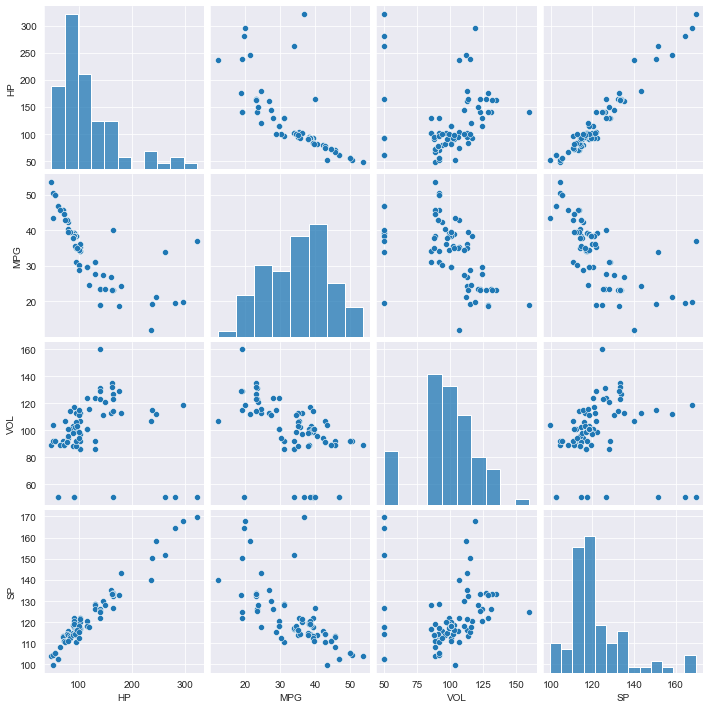

In [37]:
# Graph for 1st 3 column will be shown.

sns.pairplot(cars.iloc[:,0:4])

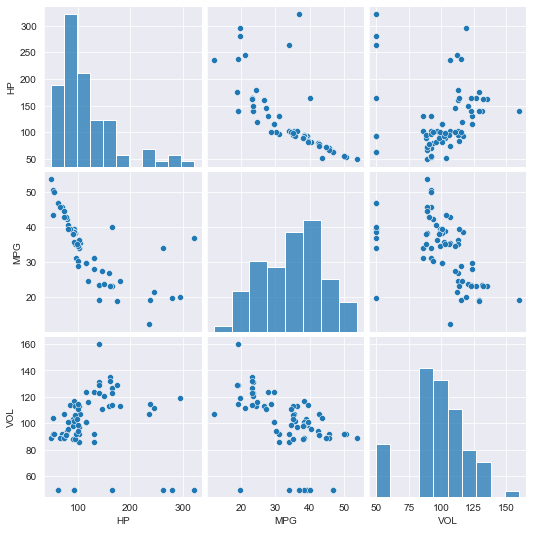

In [38]:
# Graph for 1st 2 column will be shown.

sns.pairplot(cars.iloc[:,0:3])

In [46]:
c = cars.iloc[:,0:10]
c

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [47]:
sns.pairplot.c

AttributeError: 'function' object has no attribute 'c'

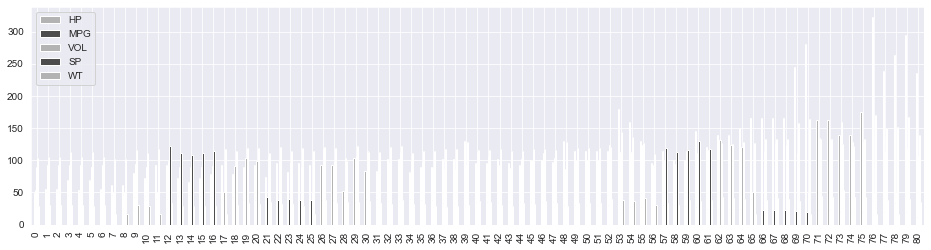

In [48]:
# Bar Graph

ax = cars.plot.bar(color=['.7','.3'],figsize = (16,4))

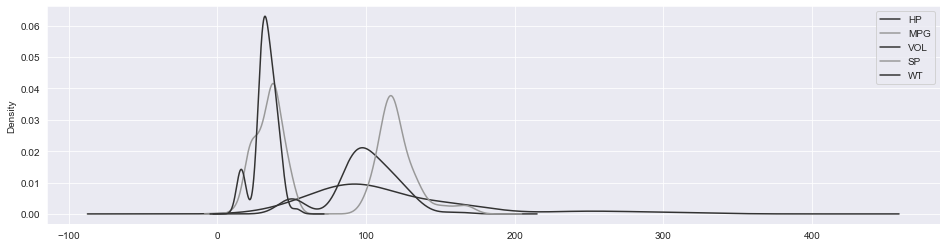

In [49]:
# Density Plot

ax = cars.plot.kde(color=['.2','.6'],figsize = (16,4))

Text(0.5, 0.98, 'Two Variable Plots')

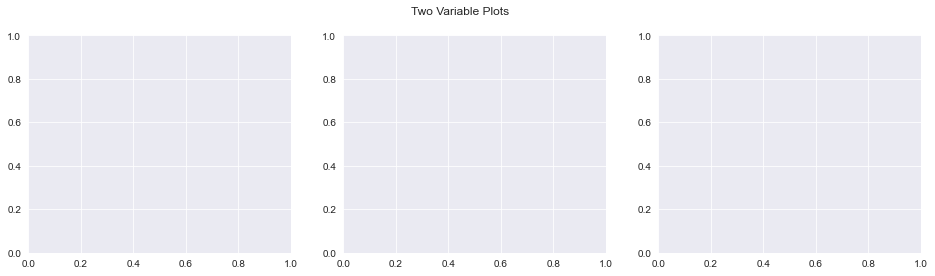

In [50]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
fig.suptitle('Two Variable Plots')

In [57]:
cars.plot.line(ax=ax1, title='Line Plot')

<AxesSubplot:title={'center':'Line Plot'}>

In [55]:
cars.plot.scatter(x='MPG',y='WT',ax=ax2,title='ScatterPlot')

<AxesSubplot:title={'center':'ScatterPlot'}, xlabel='MPG', ylabel='WT'>

In [71]:
cars.plot.bar(ax=ax3, title='Bar Plot')

<AxesSubplot:title={'center':'Bar Plot'}>

# EDA with VIsualization

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [69]:
c = pd.read_csv('Cars.csv')

In [70]:
c.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [72]:
c.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [73]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP', ylabel='SP'>

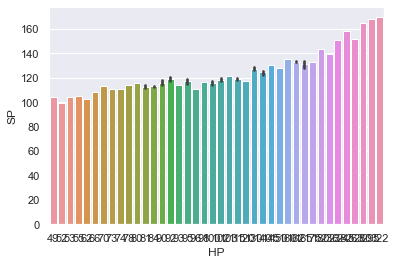

In [75]:
sns.barplot(c["HP"],c["SP"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MPG', ylabel='WT'>

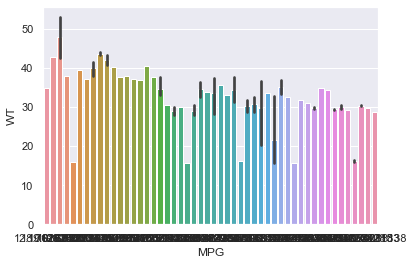

In [76]:
sns.barplot(c["MPG"],c["WT"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WT', ylabel='VOL'>

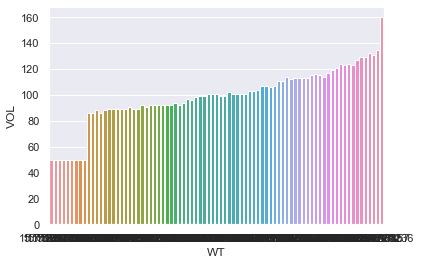

In [77]:
sns.barplot(c["WT"],c["VOL"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

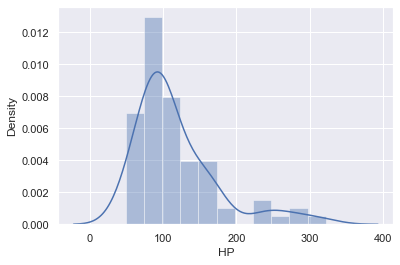

In [78]:
sns.distplot(c['HP'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG', ylabel='Density'>

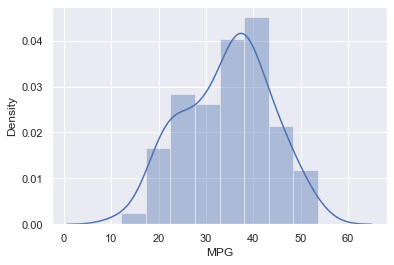

In [80]:
sns.distplot(c['MPG'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


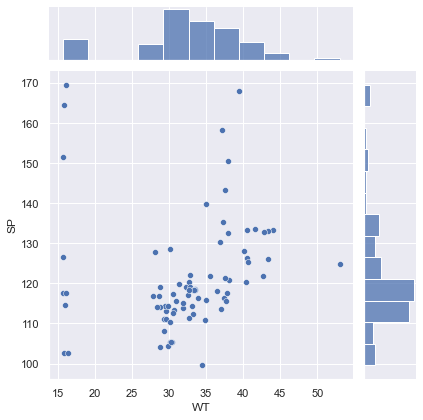

In [81]:
sns.jointplot(c['WT'],c['SP'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


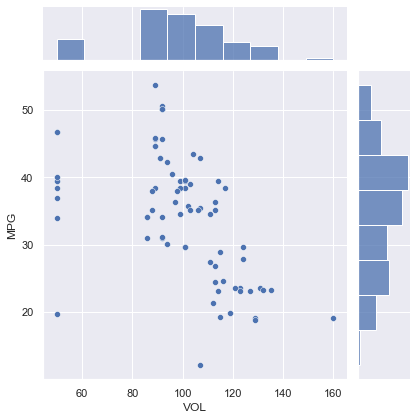

In [82]:
sns.jointplot(c['VOL'],c['MPG'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


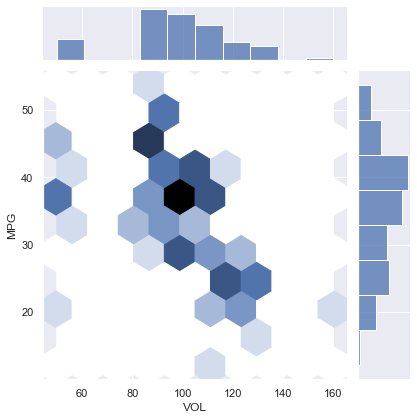

In [84]:
sns.jointplot(c['VOL'],c['MPG'], kind="hex")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


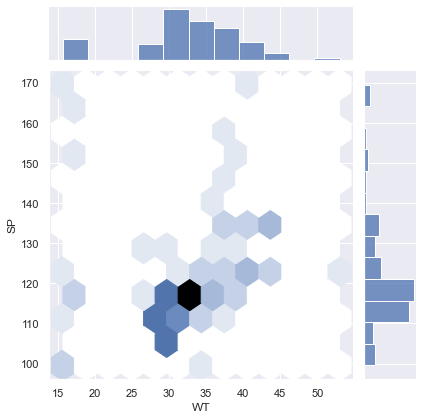

In [85]:
sns.jointplot(c['WT'],c['SP'], kind="hex")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


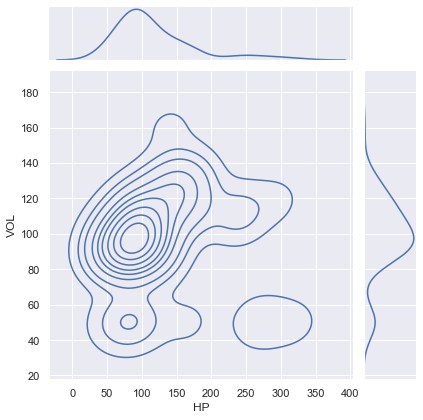

In [86]:
sns.jointplot(c['HP'],c['VOL'], kind="kde")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


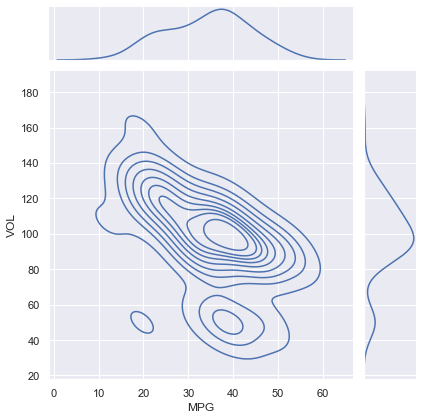

In [87]:
sns.jointplot(c['MPG'],c['VOL'], kind="kde")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MPG', ylabel='VOL'>

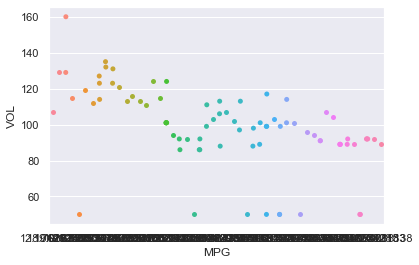

In [88]:
sns.stripplot(c['MPG'],c['VOL'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MPG', ylabel='VOL'>

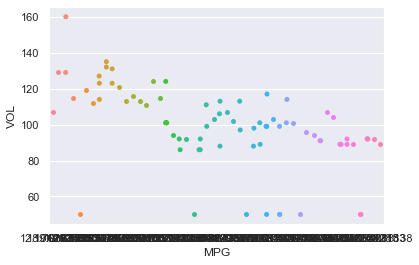

In [89]:
sns.stripplot(c['MPG'],c['VOL'], jitter = True)

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MPG', ylabel='VOL'>

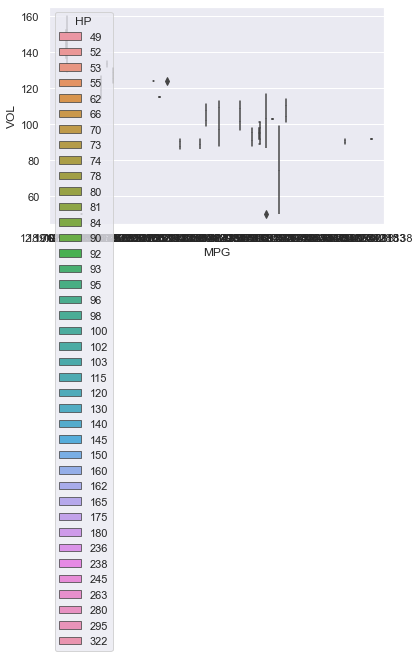

In [90]:
sns.boxplot(c['MPG'],c['VOL'], hue=c['HP'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VOL', ylabel='count'>

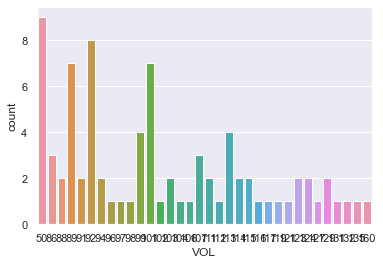

In [91]:
sns.countplot(c['VOL'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MPG', ylabel='VOL'>

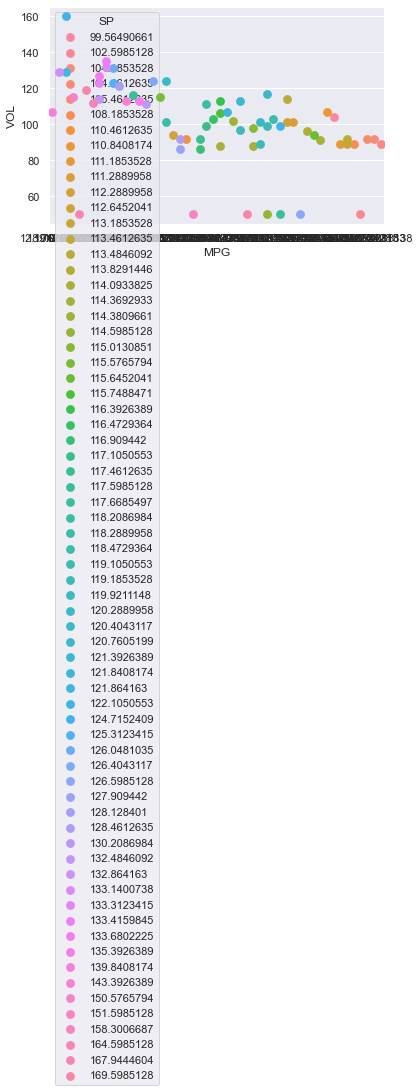

In [92]:
sns.pointplot(c['MPG'],c['VOL'], hue=c['SP'])

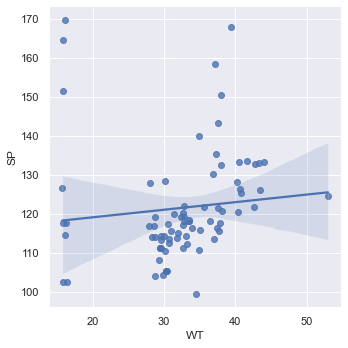

In [94]:
sns.lmplot(x='WT',y='SP', data=c )